In [158]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\Owner\\Desktop\\DataFolders\\master_dataset_6.csv")

df = df.iloc[:,2:]

for column in df.columns:
    df[column] =  df[column]/ df[column].abs().max()

alpha = .01
iterations = 1500
theta = np.zeros(2)

theta = theta.reshape(2,1)

Astar = df.iloc[:2883]
bfs = df.iloc[2883:5719]
dikjstra = df.iloc[5719:]





xA= Astar.values[:,0]
yA = Astar.values[:,1]

xbfs= bfs.values[:,0]
ybfs = bfs.values[:,1]

xDik= dikjstra.values[:,0]
yDik = dikjstra.values[:,1]




mA = len(xA)
mB = len(xbfs)
mD = len(xDik)

x0A = np.ones((mA,1))
x0B = np.ones((mB,1))
x0D = np.ones((mD,1))


xAhold =xA.reshape(mA,1)
xBhold =xbfs.reshape(mB,1)
xDhold =xDik.reshape(mD,1)
yAhold =yA.reshape(mA,1)
yBhold =ybfs.reshape(mB,1)
yDhold =yDik.reshape(mD,1)


xA = np.hstack((x0A, xAhold))
yA = yAhold

xBfs = np.hstack((x0B,xBhold))
yBfs = yBhold

xDik = np.hstack((x0D,xDhold))
yDik = yDhold

xATrain,xATest,yATrain,yATest = train_test_split(xA,yA,test_size = .2, random_state = 50)
mAtrain = len(xATrain)

xBFSTrain,xBFSTest,yBFSTrain,yBFSTest = train_test_split(xBfs,yBfs,test_size = .2, random_state = 50)
mBtrain = len(xBFSTrain)

xDTrain,xDTest,yDTrain,yDTest = train_test_split(xDik,yDik,test_size = .2, random_state = 50)
mDtrain = len(xDTrain)


In [159]:



def findLoss(X, Y, theta, m):
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J



df

,Length,Time
0,0.096774,0.102151
1,0.129032,0.225806
2,0.161290,0.338710
3,0.193548,0.053763
4,0.225806,0.123656
...,...,...
8724,0.516129,0.118280
8725,0.548387,0.102151
8726,0.580645,0.333333
8727,0.612903,0.032258


In [160]:

def gradientDescentLOSS(X, Y, theta, alpha, iterations, m, xTest, yTest):
    
    cost_history = np.zeros(iterations)
    cost_historyTest = np.zeros(iterations)
    for i in range(iterations): 
        predictions = X.dot(theta) 
        errors = np.subtract(predictions, Y) 
        sum_delta = (alpha / m) * X.transpose().dot(errors); 
        theta = theta - sum_delta;
        cost_history[i] = findLoss(X, Y, theta,m)
        cost_historyTest[i] = findLoss(xTest,yTest,theta,m)
    return theta, cost_history, cost_historyTest

In [161]:



thetaAstar, losstranA, lossHistoryTESTA = gradientDescentLOSS(xATrain,yATrain,theta,alpha,iterations, mAtrain,xATest,yATest)

thetaAstar, losstranA, lossHistoryTESTA

(array([[0.11814326],
        [0.018039  ]]),
 array([0.01324336, 0.01307548, 0.01291132, ..., 0.00566354, 0.00566352,
        0.00566351]),
 array([0.00317273, 0.00313237, 0.00309292, ..., 0.00141447, 0.00141447,
        0.00141446]))

(array([[0.11814326],
        [0.018039  ]]),
 array([0.01324336, 0.01307548, 0.01291132, ..., 0.00566354, 0.00566352,
        0.00566351]),
 array([0.00317273, 0.00313237, 0.00309292, ..., 0.00141447, 0.00141447,
        0.00141446]))

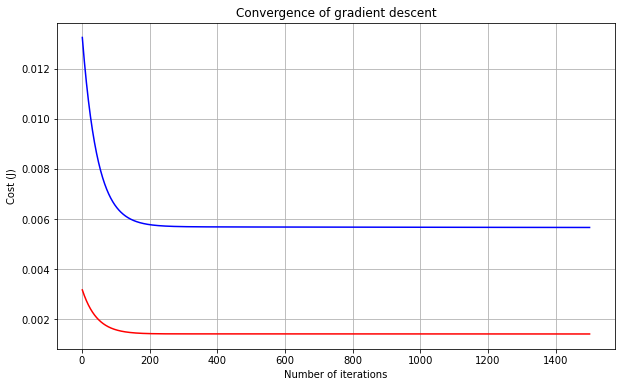

In [162]:
plt.plot(range(1, iterations + 1),losstranA, color='blue') 
plt.plot(range(1, iterations + 1),lossHistoryTESTA, color='red') 

plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 

#blue is the loss of the training set 
#red is loss of the test set
thetaAstar, losstranA, lossHistoryTESTA

(array([[0.09355117],
        [0.00940786]]),
 array([0.008875  , 0.00877358, 0.00867441, ..., 0.00427521, 0.0042752 ,
        0.00427518]),
 array([0.00225297, 0.0022267 , 0.002201  , ..., 0.00100655, 0.00100654,
        0.00100654]))

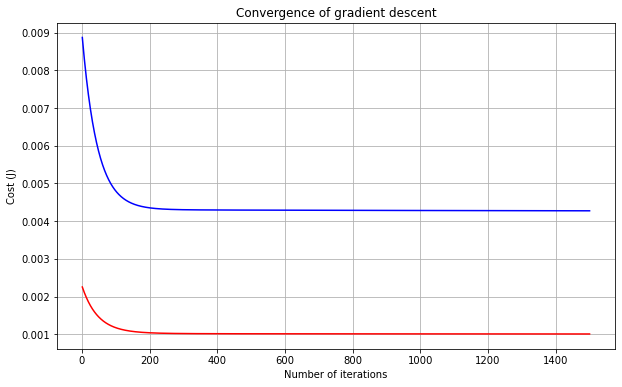

In [163]:
thetaB, losstranB, lossHistoryTESTB = gradientDescentLOSS(xBFSTrain,yBFSTrain,theta,alpha,iterations, mBtrain,xBFSTest,yBFSTest)



plt.plot(range(1, iterations + 1),losstranB, color='blue') 
plt.plot(range(1, iterations + 1),lossHistoryTESTB, color='red') 

plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 

#blue is the loss of the training set 
#red is loss of the test set
thetaB, losstranB, lossHistoryTESTB

(array([[0.16621662],
        [0.00142269]]),
 array([0.02478487, 0.02448175, 0.0241854 , ..., 0.01103825, 0.01103817,
        0.01103808]),
 array([0.00628713, 0.00621031, 0.0061352 , ..., 0.00274514, 0.00274511,
        0.00274508]))

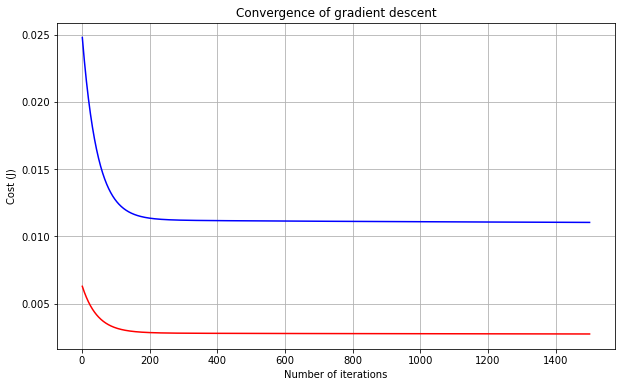

In [164]:
thetaD, losstranD, lossHistoryTESTD = gradientDescentLOSS(xDTrain,yDTrain,theta,alpha,iterations, mDtrain,xDTest,yDTest)



plt.plot(range(1, iterations + 1),losstranD, color='blue') 
plt.plot(range(1, iterations + 1),lossHistoryTESTD, color='red') 

plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 

#blue is the loss of the training set 
#red is loss of the test set
thetaD, losstranD, lossHistoryTESTD